# Six-Hump Camel Optimization Plots

This notebook generates plots for the Six-Hump Camel function optimization results.

## Overview

- **Function**: Six-Hump Camel function with global minima at f(±0.0898, ∓0.7126) ≈ -1.0316
- **Domain**: x₁ ∈ [-3, 3], x₂ ∈ [-2, 2]
- **Data Sources**:
  - `population_log.csv`: Initial population from scatter search
  - `stage1_log.csv`: Scatter search progress metrics
  - `stage2_log.csv`: Local optimization convergence data

## Requirements

- Python 3.x
- Jupyter Notebook
- Required Python libraries:
  - numpy
  - pandas
  - matplotlib
- Data Files:
  - `population_log.csv`: Initial population from scatter search
  - `stage1_log.csv`: Scatter search progress metrics
  - `stage2_log.csv`: Local optimization convergence data
- LaTeX installation for rendering mathematical expressions in plots (optional but recommended)


In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

# Set plotting style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# Configure matplotlib
plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 600
plt.rcParams["font.size"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

save_plots = True  # Set to True to save plots


def six_hump_camel(x1, x2):
    """Six-Hump Camel function"""
    return (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2


# Function bounds
BOUNDS = {"x_min": -3, "x_max": 3, "y_min": -2, "y_max": 2}

# Known global minima (approximate)
GLOBAL_MINIMA = [
    {"x1": 0.0898, "x2": -0.7126, "f": -1.0316284535},
    {"x1": -0.0898, "x2": 0.7126, "f": -1.0316284535},
]

In [2]:
# Load optimization data from CSV files
print("Loading optimization data...")

# Load initial population
population_df = pd.read_csv("population_log.csv")

print(f"Loaded initial population: {len(population_df)} points")
print(
    f"Population range - x1: [{population_df['x1'].min():.3f}, {population_df['x1'].max():.3f}], x2: [{population_df['x2'].min():.3f}, {population_df['x2'].max():.3f}]"
)
print(
    f"Best initial point: f({population_df.loc[population_df['objective'].idxmin(), 'x1']:.4f}, {population_df.loc[population_df['objective'].idxmin(), 'x2']:.4f}) = {population_df['objective'].min():.6f}"
)

# Load Stage 1 (scatter search) data
stage1_df = pd.read_csv("stage1_log.csv")
print(f"\nLoaded Stage 1 data: {len(stage1_df)} records")
print(f"Stage 1 completed in {stage1_df['total_time_sec'].iloc[-1]:.6f} seconds")
print(f"Final Stage 1 objective: {stage1_df['best_objective'].dropna().iloc[-1]:.6f}")

# Load Stage 2 (local optimization) data
stage2_df = pd.read_csv("stage2_log.csv")
print(f"\nLoaded Stage 2 data: {len(stage2_df)} iterations")
print(f"Stage 2 completed in {stage2_df['total_time_sec'].iloc[-1]:.6f} seconds")
print(f"Final Stage 2 objective: {stage2_df['best_objective'].iloc[-1]:.6f}")

print("\nData loading complete!")

Loading optimization data...
Loaded initial population: 50 points
Population range - x1: [-1.698, 2.014], x2: [-0.931, 1.002]
Best initial point: f(1.7547, -0.7180) = -0.121611

Loaded Stage 1 data: 6 records
Stage 1 completed in 0.000359 seconds
Final Stage 1 objective: -0.215464

Loaded Stage 2 data: 50 iterations
Stage 2 completed in 0.000090 seconds
Final Stage 2 objective: -1.031628

Data loading complete!


## 1. Contour Plot with Initial Population

This plot shows the Six-Hump Camel function landscape with the initial population points generated by scatter search.


Saved: sixhumpcamel_contour_with_initial_population.svg


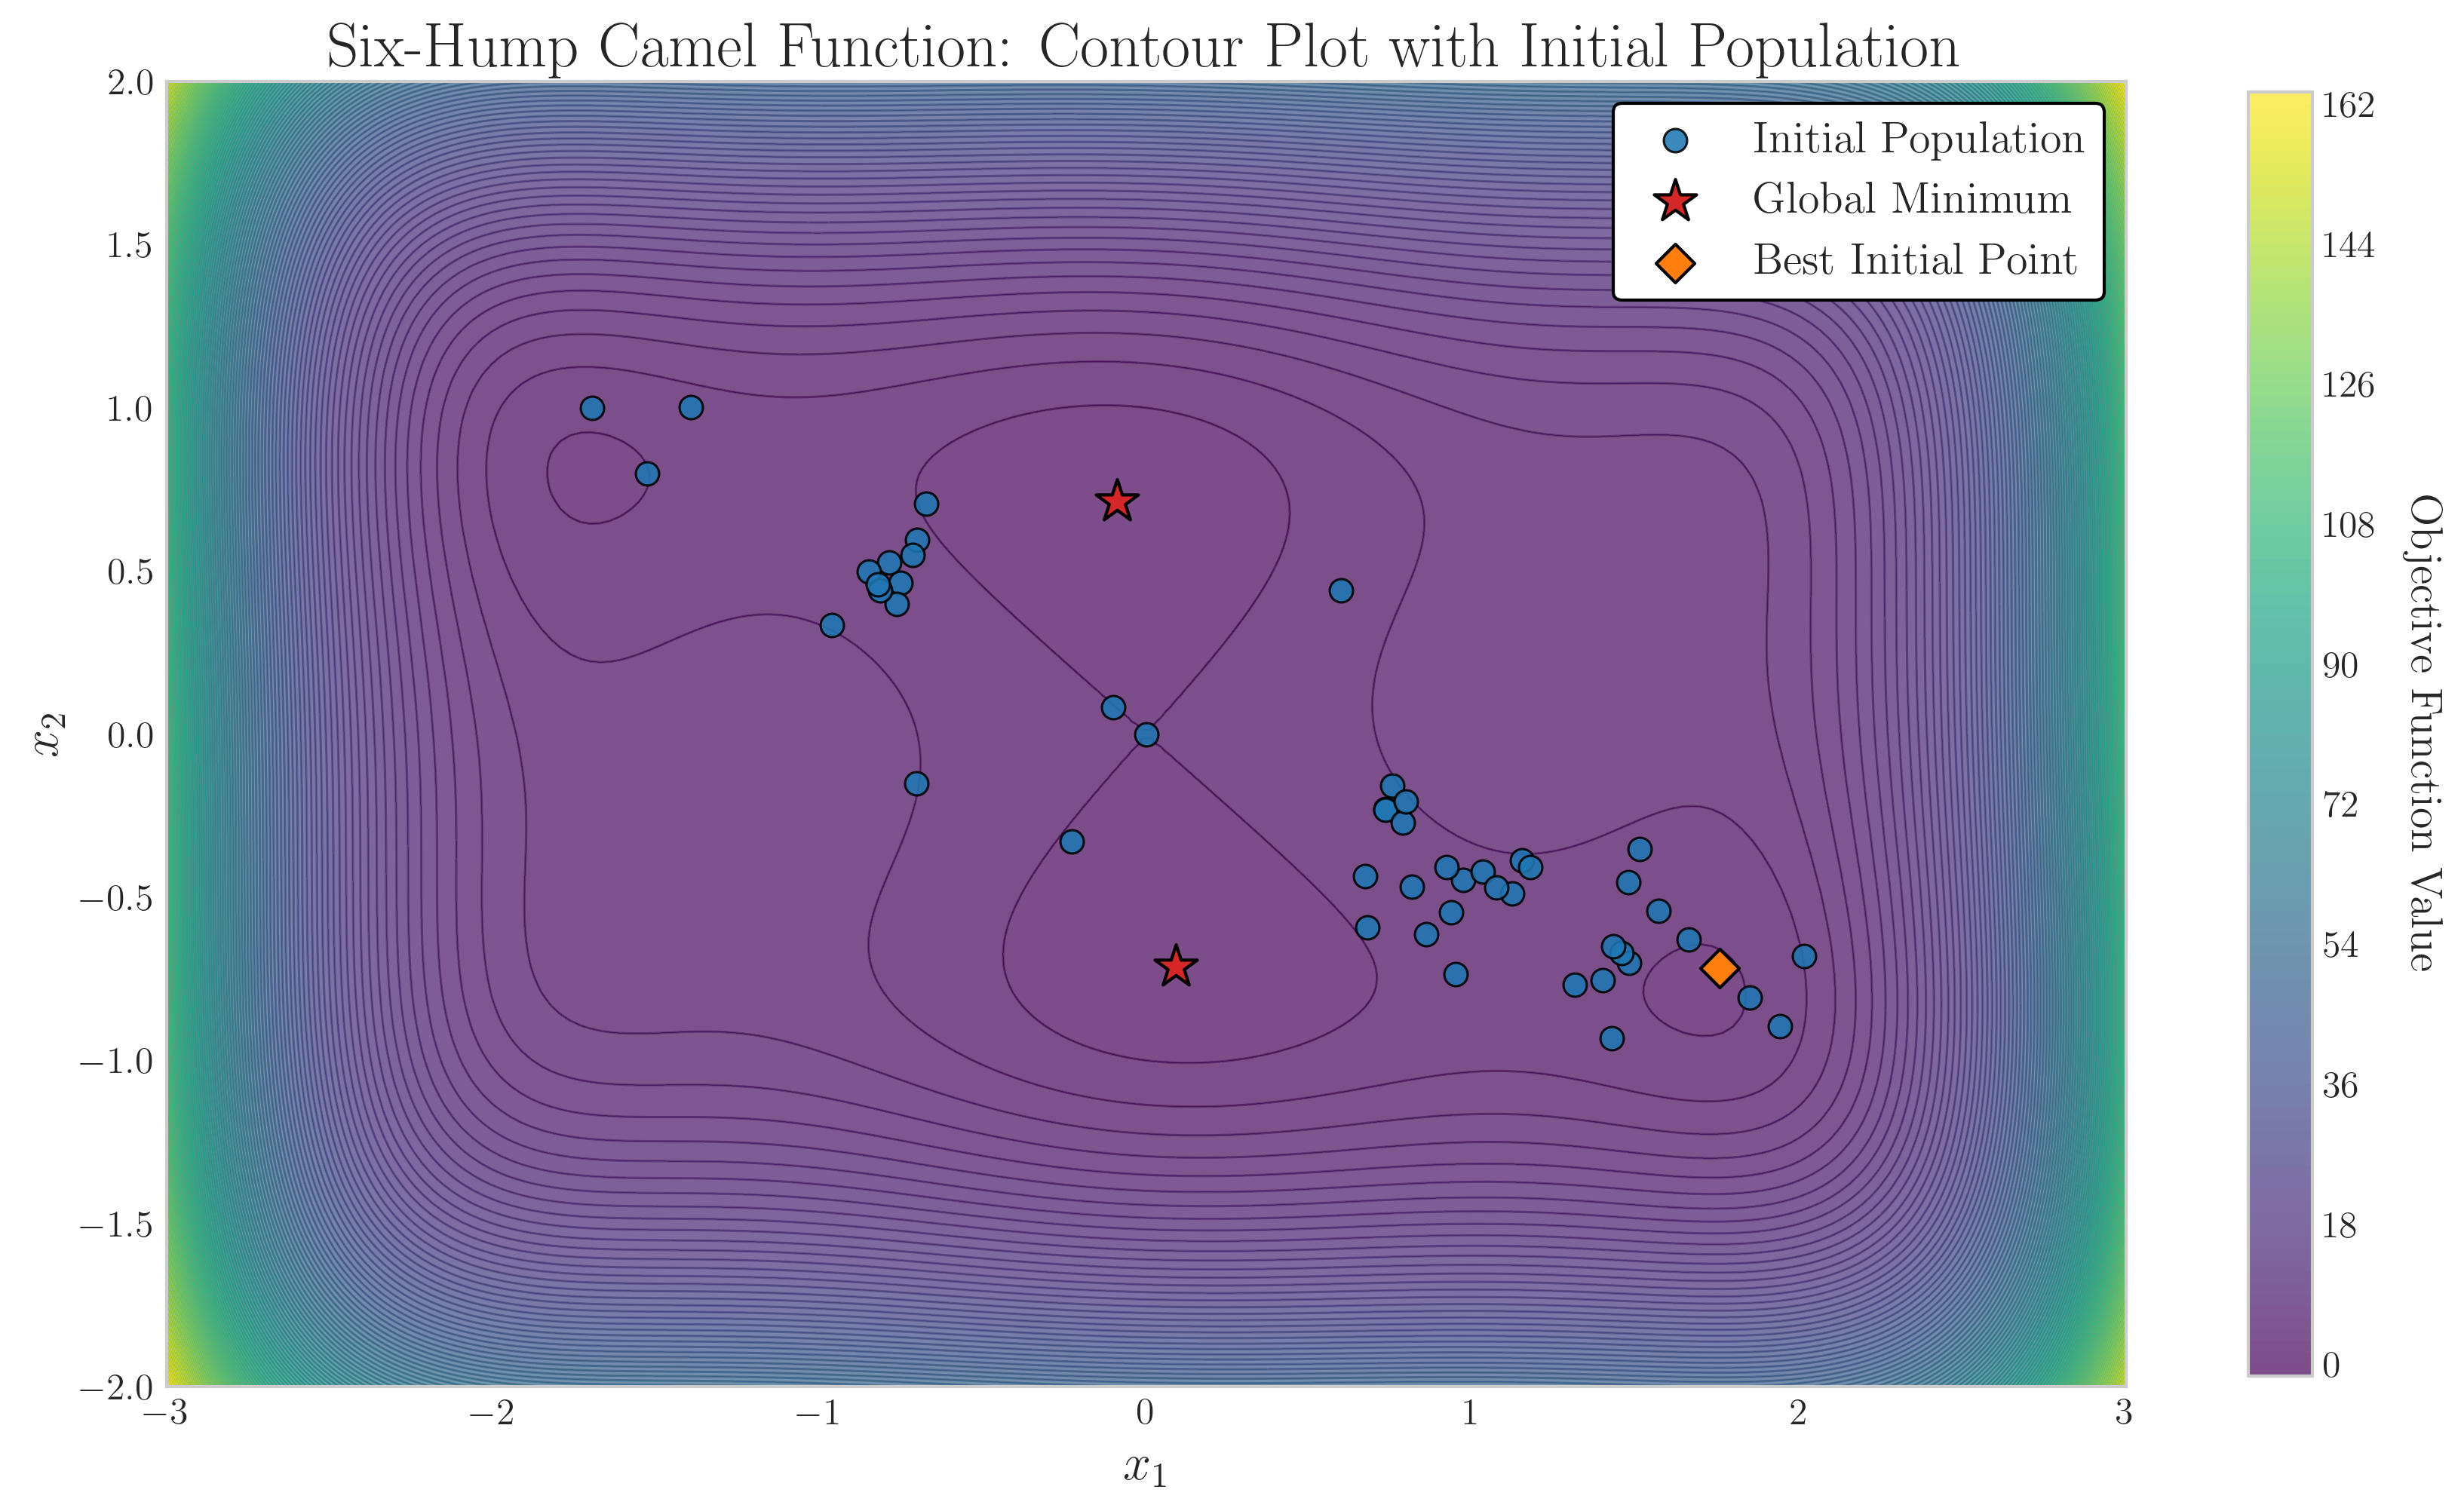

In [3]:
# Create meshgrid for contour plot
x_range = np.linspace(BOUNDS["x_min"], BOUNDS["x_max"], 200)
y_range = np.linspace(BOUNDS["y_min"], BOUNDS["y_max"], 200)

X, Y = np.meshgrid(x_range, y_range)
Z = six_hump_camel(X, Y)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create contour plot
contour = ax.contour(
    X, Y, Z, levels=150, alpha=0.9, colors="gray", linewidths=0.75, zorder=0
)
contourf = ax.contourf(X, Y, Z, levels=150, alpha=0.7, cmap="viridis")

# Add colorbar for contours
cbar1 = plt.colorbar(contourf, ax=ax, shrink=0.6, aspect=20)
cbar1.set_label("Objective Function Value", rotation=270, labelpad=20)

# Plot initial population points
scatter = ax.scatter(
    population_df["x1"],
    population_df["x2"],
    color="tab:blue",
    s=55,
    marker="o",
    alpha=0.875,
    edgecolors="black",
    linewidth=0.75,
    label="Initial Population",
    zorder=5,
)

# Highlight global minima
for i, minimum in enumerate(GLOBAL_MINIMA):
    ax.scatter(
        minimum["x1"],
        minimum["x2"],
        color="tab:red",
        s=200,
        marker="*",
        edgecolors="black",
        linewidth=1,
        label="Global Minimum" if i == 0 else None,
        zorder=10,
    )

# Highlight best initial point
best_idx = population_df["objective"].idxmin()
best_point = population_df.loc[best_idx]
ax.scatter(
    best_point["x1"],
    best_point["x2"],
    color="tab:orange",
    s=75,
    marker="D",
    edgecolors="black",
    linewidth=1,
    label="Best Initial Point",
    zorder=9,
)

# Formatting
ax.set_xlabel("$x_1$", fontsize=16)
ax.set_ylabel("$x_2$", fontsize=16)
ax.set_title(
    "Six-Hump Camel Function: Contour Plot with Initial Population",
    pad=5,
)
ax.grid(False)
ax.set_aspect("equal", adjustable="box")

# Create legend with explicit frame settings
legend = ax.legend(
    loc="upper right",
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend.set_frame_on(True)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(1)
plt.tight_layout()

if save_plots:
    filename = "sixhumpcamel_contour_with_initial_population.svg"
    plt.savefig(filename, bbox_inches="tight")
    print(f"Saved: {filename}")

plt.show()

## 2. 3D Surface Plot with Initial Population

This 3D visualization shows the Six-Hump Camel function surface with the initial population points overlaid.


Saved: sixhump_camel_3d_surface_with_population.svg


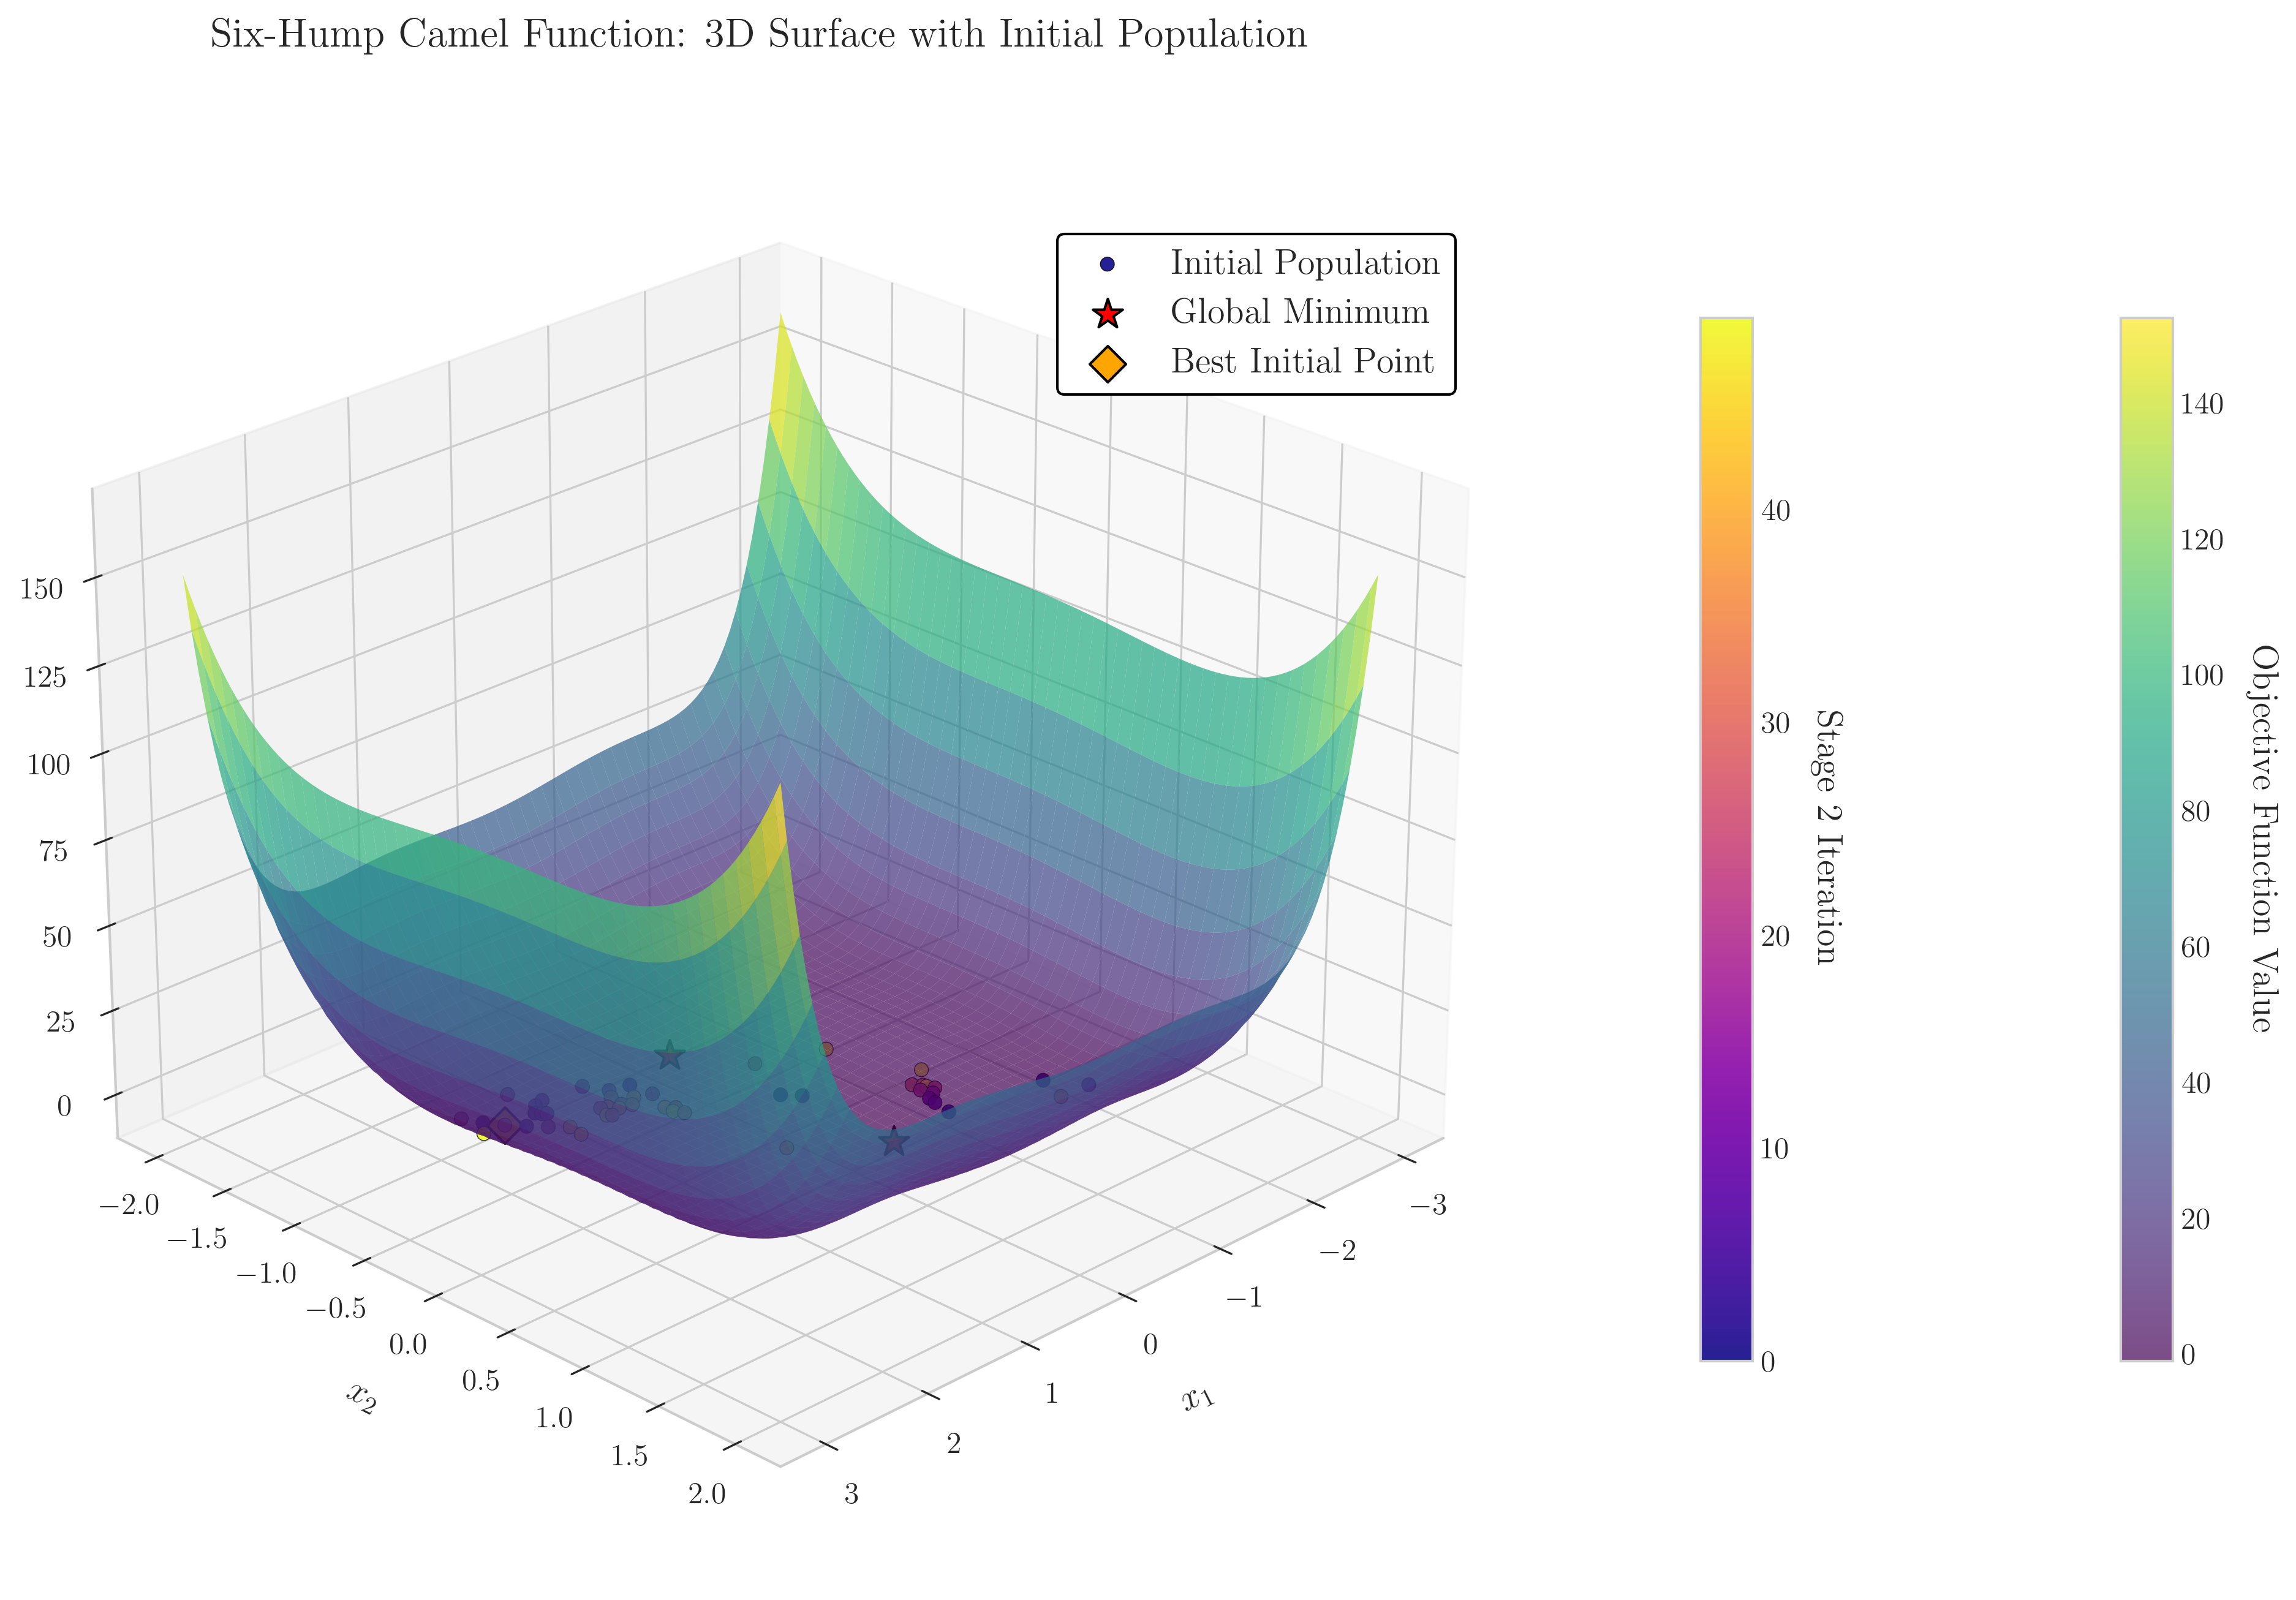

In [4]:
# Create meshgrid for surface plot
x_range = np.linspace(BOUNDS["x_min"], BOUNDS["x_max"], 100)
y_range = np.linspace(BOUNDS["y_min"], BOUNDS["y_max"], 100)
X, Y = np.meshgrid(x_range, y_range)
Z = six_hump_camel(X, Y)

# Create figure with 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Create surface plot
surface = ax.plot_surface(
    X,
    Y,
    Z,
    alpha=0.7,
    cmap="viridis",
    linewidth=0,
    antialiased=True,
    rasterized=True,
)


# Add colorbar for surface
cbar1 = fig.colorbar(surface, ax=ax, shrink=0.6, aspect=20)
cbar1.set_label("Objective Function Value", rotation=270, labelpad=20)

# Plot initial population points
scatter = ax.scatter(
    population_df["x1"],
    population_df["x2"],
    population_df["objective"],
    c=list(range(len(population_df))),
    cmap="plasma",
    s=30,
    alpha=0.9,
    edgecolors="black",
    linewidth=0.3,
    label="Initial Population",
)
# Add colorbar for population points
cbar2 = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=20, pad=0.1)
cbar2.set_label("Stage 2 Iteration", rotation=270, labelpad=20)
# Highlight global minima
for i, minimum in enumerate(GLOBAL_MINIMA):
    ax.scatter(
        minimum["x1"],
        minimum["x2"],
        minimum["f"],
        color="red",
        s=150,
        marker="*",
        edgecolors="black",
        linewidth=1,
        label="Global Minimum" if i == 0 else None,
        zorder=10,
    )
# Highlight best initial point
best_idx = population_df["objective"].idxmin()
best_point = population_df.loc[best_idx]
ax.scatter(
    best_point["x1"],
    best_point["x2"],
    best_point["objective"],
    color="orange",
    s=100,
    marker="D",
    edgecolors="black",
    linewidth=1,
    label="Best Initial Point",
    zorder=9,
)
# Formatting
ax.set_xlabel("$x_1$", labelpad=10, fontsize=14)
ax.set_ylabel("$x_2$", labelpad=10, fontsize=14)
ax.set_zlabel("Objective Value", labelpad=10, fontsize=14)
ax.set_title(
    "Six-Hump Camel Function: 3D Surface with Initial Population",
    fontsize=16,
    pad=20,
)

# Create legend with explicit frame settings
legend = ax.legend(
    loc=[0.7, 0.8],
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend.set_frame_on(True)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(1)

# Adjust viewing angle for better visualization
ax.view_init(elev=25, azim=45)
plt.tight_layout()
if save_plots:
    filename = "sixhump_camel_3d_surface_with_population.svg"
    plt.savefig(filename, bbox_inches="tight")
    print(f"Saved: {filename}")
plt.show()

## 3. Convergence Analysis

This section shows the convergence behavior of the optimization algorithm


Saved: sixhump_camel_convergence_analysis.svg


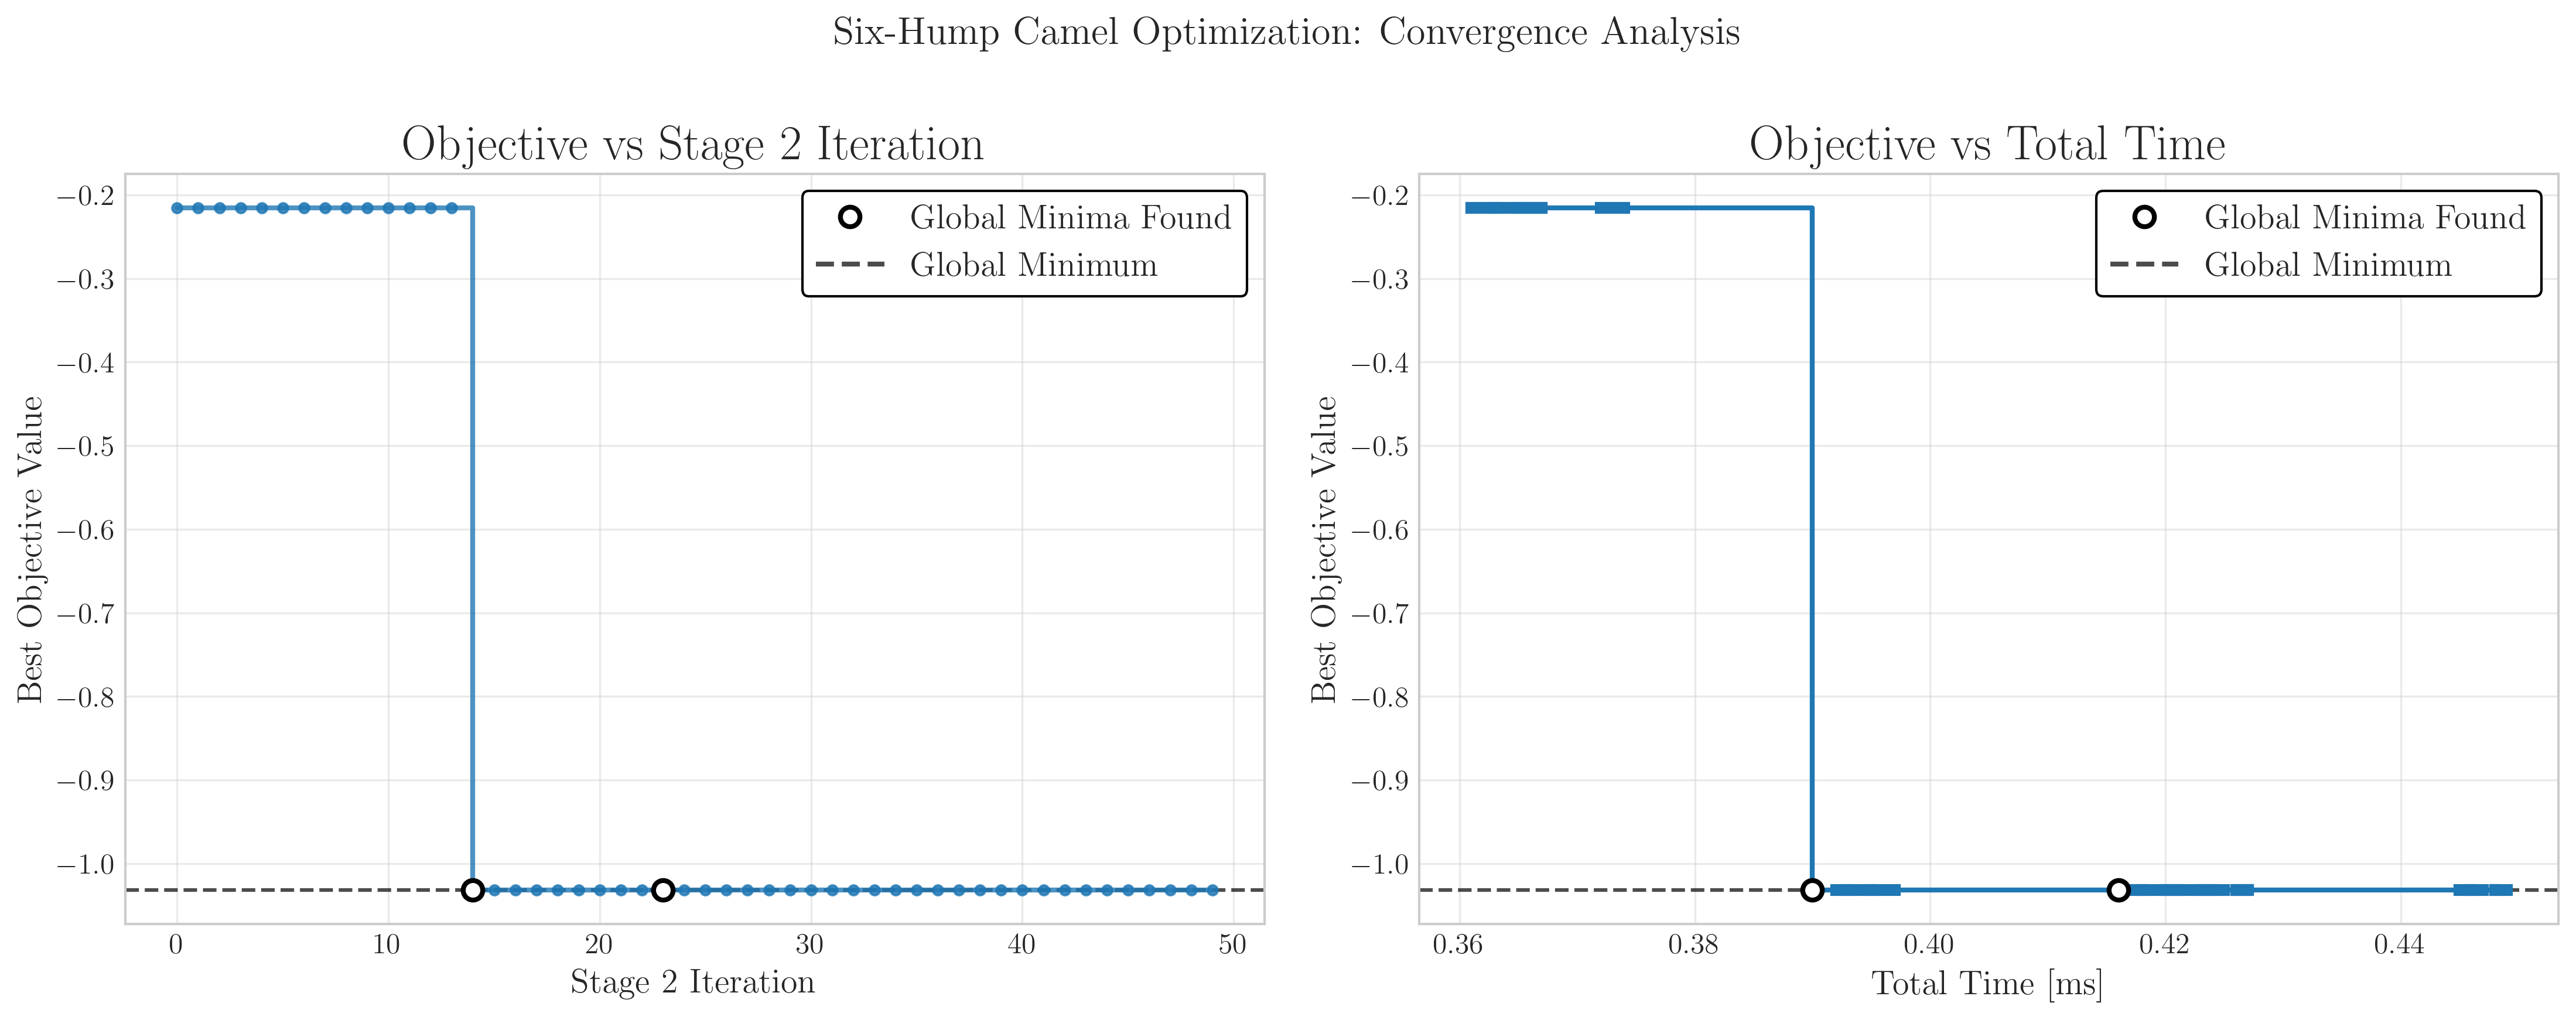

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Six-Hump Camel Optimization: Convergence Analysis", fontsize=16)

# Plot 1: Stage 2 - Best objective vs iteration
axes[0].axhline(
    y=GLOBAL_MINIMA[0]["f"],
    color="black",
    linestyle="--",
    alpha=0.7,
    label="Global Minimum",
)

axes[0].plot(
    stage2_df["iteration"],
    stage2_df["best_objective"],
    color="tab:blue",
    linewidth=2,
    marker="o",
    markersize=4,
    alpha=0.8,
    drawstyle="steps-post",
)

axes[0].set_xlabel("Stage 2 Iteration")
axes[0].set_ylabel("Best Objective Value")
axes[0].set_title("Objective vs Stage 2 Iteration")
axes[0].grid(True, alpha=0.4)

# Mark where global minima is first found
global_minima_value = GLOBAL_MINIMA[0]["f"]
tolerance = 1e-6
global_minima_idx = stage2_df[
    stage2_df["best_objective"] <= global_minima_value + tolerance
].index
if len(global_minima_idx) > 0:
    first_global_idx = global_minima_idx[0]
    iter_val = stage2_df.loc[first_global_idx, "iteration"]
    obj_val = stage2_df.loc[first_global_idx, "best_objective"]
    axes[0].plot(
        iter_val,
        obj_val,
        "wo",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
    )

# Mark where second global minima is found (solution count increases)
solution_increase_idx = stage2_df[
    stage2_df["solution_count"] > stage2_df["solution_count"].shift(1)
].index
if len(solution_increase_idx) > 0:
    second_global_idx = solution_increase_idx[0]
    iter_val = stage2_df.loc[second_global_idx, "iteration"]
    obj_val = stage2_df.loc[second_global_idx, "best_objective"]
    axes[0].plot(
        iter_val,
        obj_val,
        "wo",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
    )

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        markerfacecolor="white",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
        linewidth=0,
        label="Global Minima Found",
    ),
    Line2D(
        [0],
        [0],
        color="black",
        linestyle="--",
        alpha=0.7,
        linewidth=2,
        label="Global Minimum",
    ),
]

legend0 = axes[0].legend(
    handles=legend_elements,
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend0.set_frame_on(True)
legend0.get_frame().set_alpha(1)
legend0.get_frame().set_facecolor("white")
legend0.get_frame().set_edgecolor("black")
legend0.get_frame().set_linewidth(1)

# Plot 2: Stage 2 - Objective vs time
axes[1].axhline(
    y=GLOBAL_MINIMA[0]["f"],
    color="black",
    linestyle="--",
    alpha=0.7,
    label="Global Minimum",
)

# Calculate total time (Stage 1 + Stage 2) for each point
total_time_ms = (
    stage1_df["total_time_sec"].iloc[-1] + stage2_df["total_time_sec"]
) * 1000

axes[1].plot(
    total_time_ms,
    stage2_df["best_objective"],
    color="tab:blue",
    linewidth=2,
    marker="s",
    markersize=4,
    drawstyle="steps-post",
)

axes[1].set_xlabel("Total Time [ms]")
axes[1].set_ylabel("Best Objective Value")
axes[1].set_title("Objective vs Total Time")
axes[1].grid(True, alpha=0.4)

# Mark where global minima is first found
global_minima_value = GLOBAL_MINIMA[0]["f"]
tolerance = 1e-6
global_minima_idx = stage2_df[
    stage2_df["best_objective"] <= global_minima_value + tolerance
].index

if len(global_minima_idx) > 0:
    first_global_idx = global_minima_idx[0]
    time_val = (
        stage1_df["total_time_sec"].iloc[-1]
        + stage2_df.loc[first_global_idx, "total_time_sec"]
    ) * 1000
    obj_val = stage2_df.loc[first_global_idx, "best_objective"]
    axes[1].plot(
        time_val,
        obj_val,
        "wo",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
    )

# Mark where second global minima is found (solution count increases)
solution_increase_idx = stage2_df[
    stage2_df["solution_count"] > stage2_df["solution_count"].shift(1)
].index

if len(solution_increase_idx) > 0:
    second_global_idx = solution_increase_idx[0]
    time_val = (
        stage1_df["total_time_sec"].iloc[-1]
        + stage2_df.loc[second_global_idx, "total_time_sec"]
    ) * 1000
    obj_val = stage2_df.loc[second_global_idx, "best_objective"]
    axes[1].plot(
        time_val,
        obj_val,
        "wo",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
    )

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        markerfacecolor="white",
        markersize=8,
        markeredgecolor="black",
        markeredgewidth=2,
        linewidth=0,
        label="Global Minima Found",
    ),
    Line2D(
        [0],
        [0],
        color="black",
        linestyle="--",
        alpha=0.7,
        linewidth=2,
        label="Global Minimum",
    ),
]

legend1 = axes[1].legend(
    handles=legend_elements,
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend1.set_frame_on(True)
legend1.get_frame().set_alpha(1)
legend1.get_frame().set_facecolor("white")
legend1.get_frame().set_edgecolor("black")
legend1.get_frame().set_linewidth(1)

plt.tight_layout()

if save_plots:
    filename = "sixhump_camel_convergence_analysis.svg"
    plt.savefig(filename, bbox_inches="tight")
    print(f"Saved: {filename}")

plt.show()

## 4. Zoomed 3D Surface Plot

This creates a zoomed 3D surface plot focusing on the region containing the global minima.


Stage 2 points where best solution changed: 3
Total Stage 2 iterations: 50
Saved: sixhump_camel_3d_surface_zoomed.svg


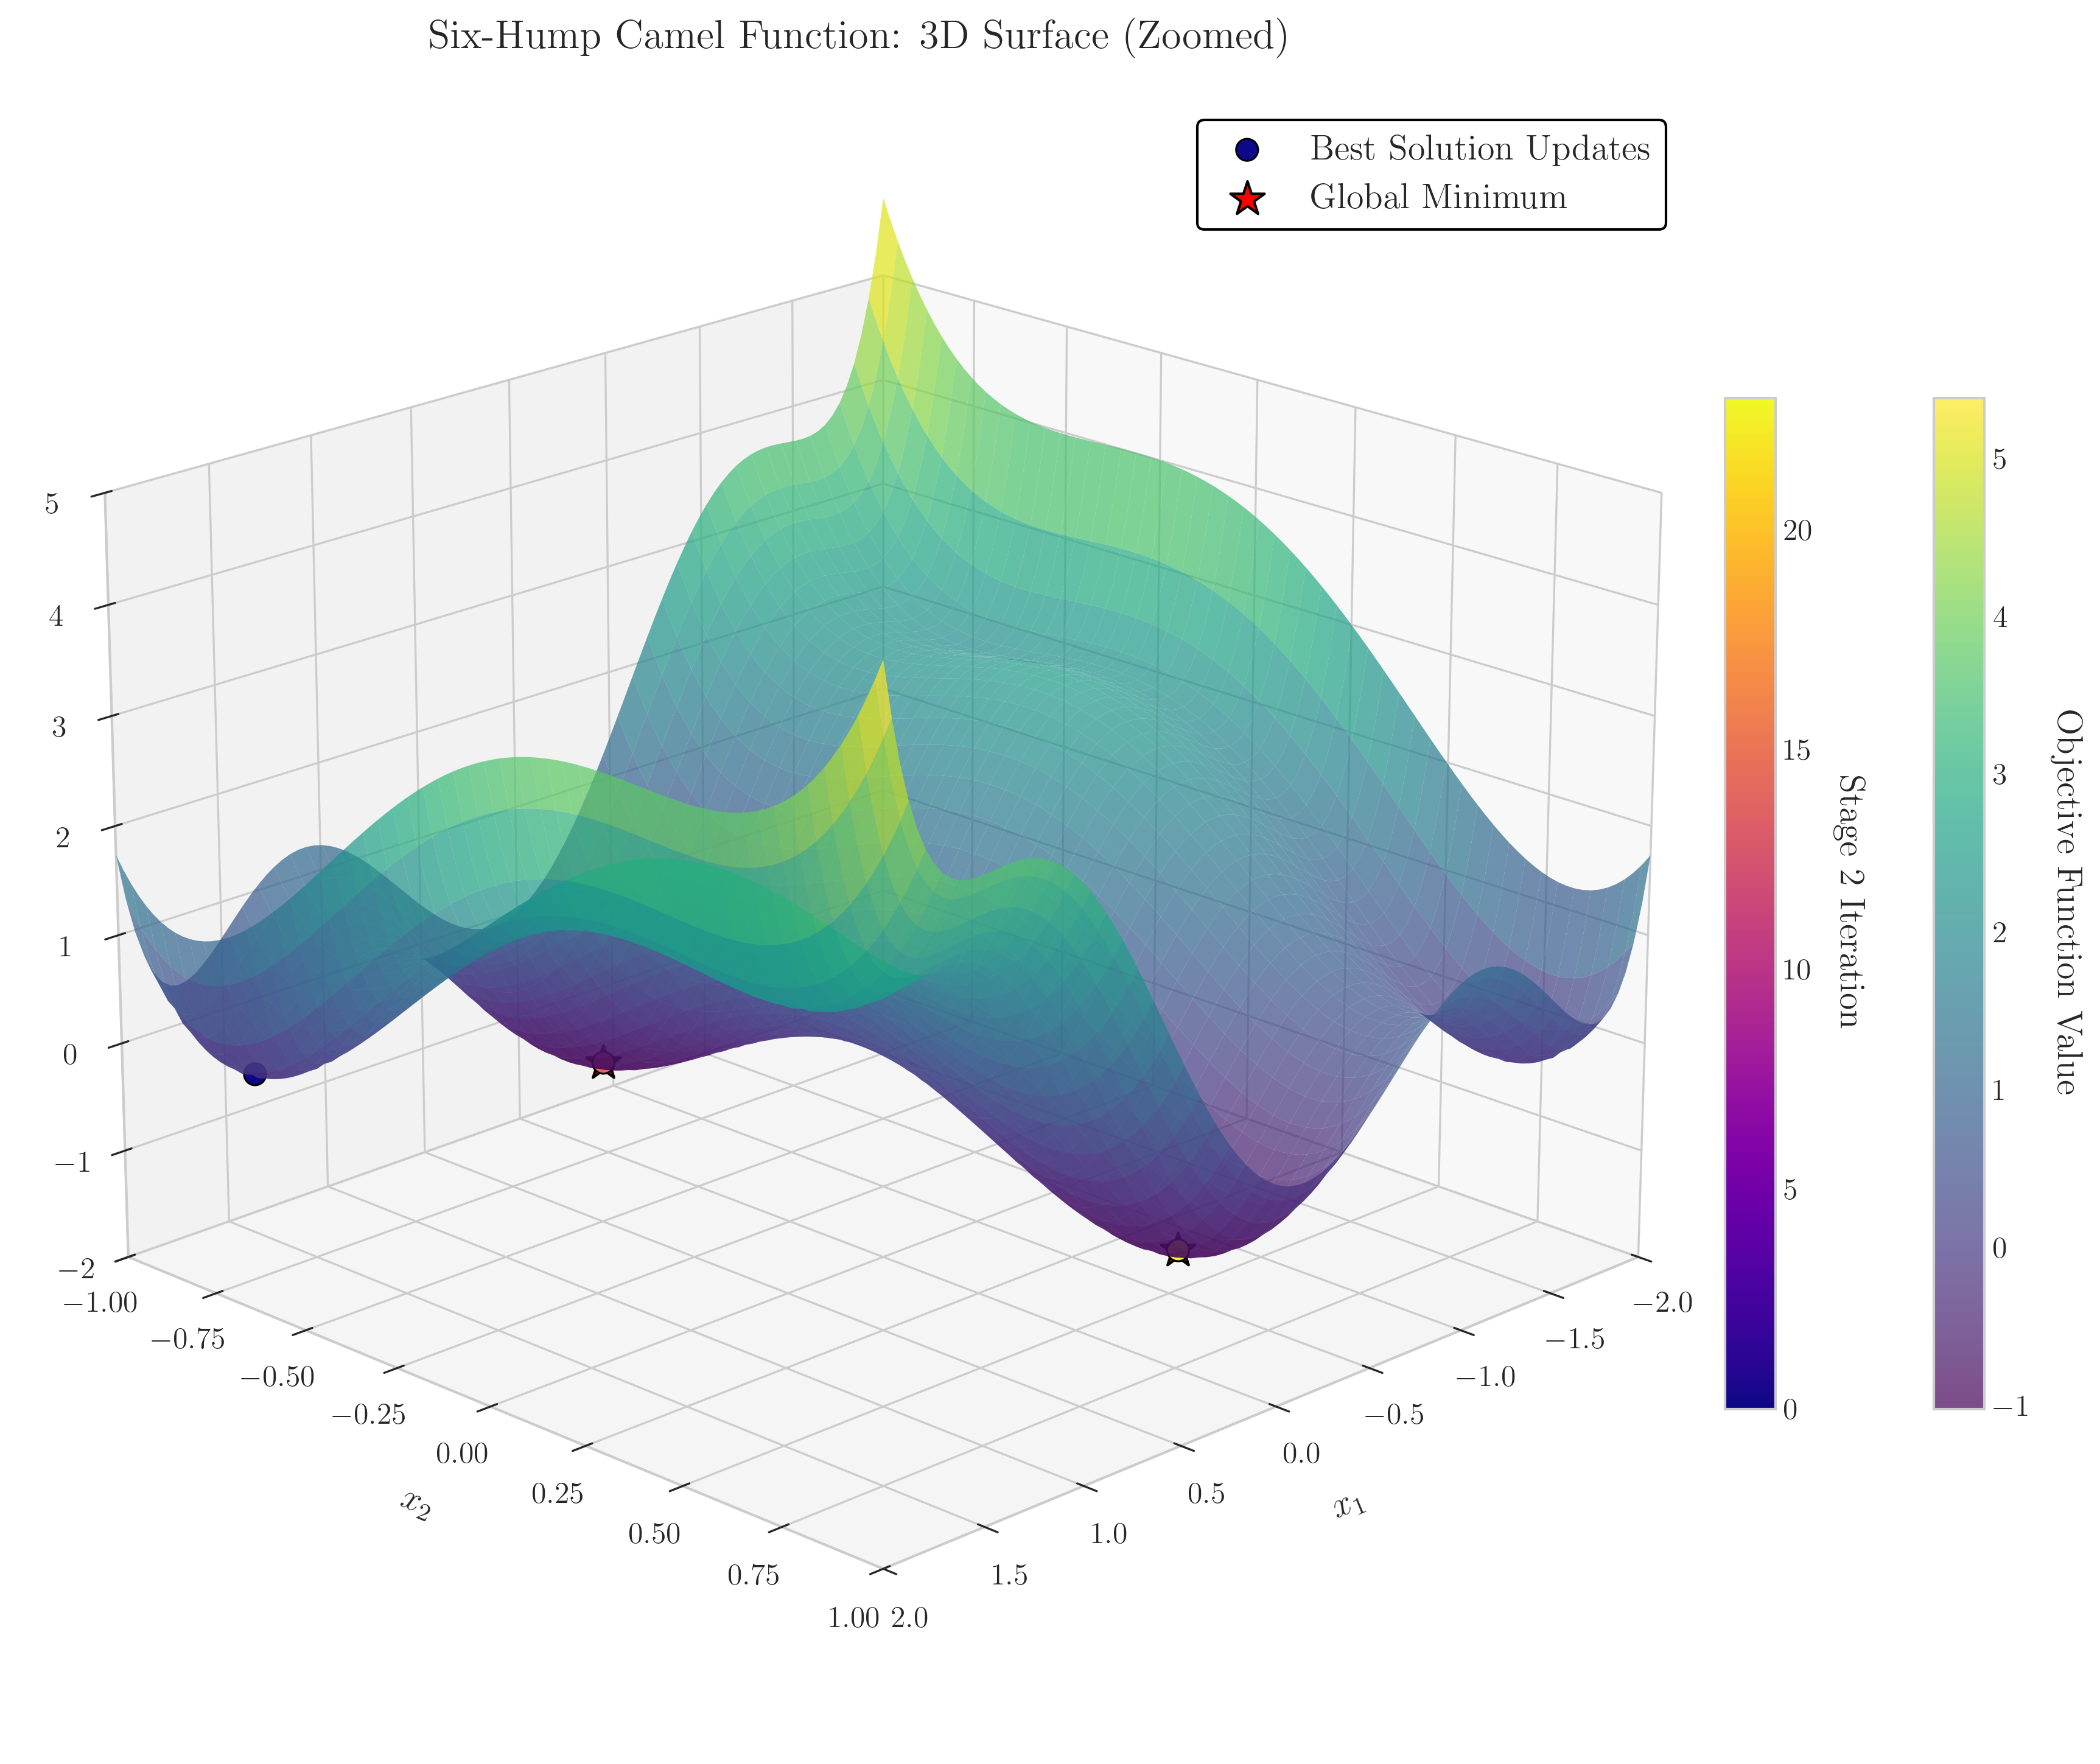

In [6]:
# Use custom zoomed bounds for Six Hump Camel
bounds = {"x_min": -2, "x_max": 2, "y_min": -1, "y_max": 1}

# Create meshgrid for surface plot
x_range = np.linspace(bounds["x_min"], bounds["x_max"], 100)
y_range = np.linspace(bounds["y_min"], bounds["y_max"], 100)
X, Y = np.meshgrid(x_range, y_range)
Z = six_hump_camel(X, Y)

# Extract points where best objective actually changes in Stage 2
# Compare each row with the previous row to detect changes
stage2_changes = stage2_df[
    (stage2_df["best_objective"] != stage2_df["best_objective"].shift(1))
    | (stage2_df["best_x1"] != stage2_df["best_x1"].shift(1))
    | (stage2_df["best_x2"] != stage2_df["best_x2"].shift(1))
].copy()

print(f"Stage 2 points where best solution changed: {len(stage2_changes)}")
print(f"Total Stage 2 iterations: {len(stage2_df)}")

# Create figure with 3D subplot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Create surface plot first
surface = ax.plot_surface(
    X,
    Y,
    Z,
    alpha=0.7,
    cmap="viridis",
    linewidth=0,
    antialiased=True,
    rasterized=True,
    zorder=1,
)

# Add colorbar for surface
cbar1 = fig.colorbar(surface, ax=ax, shrink=0.6, aspect=20, pad=-0.05)
cbar1.set_label("Objective Function Value", rotation=270, labelpad=20)

# Plot evaluation points (using stage 2 change points)
scatter = ax.scatter(
    stage2_changes["best_x1"],
    stage2_changes["best_x2"],
    stage2_changes["best_objective"],
    c=stage2_changes["iteration"],
    cmap="plasma",
    s=75,
    alpha=1,
    edgecolors="black",
    linewidth=0.75,
    label="Best Solution Updates",
    zorder=500,
)

# Add colorbar for evaluation points
cbar2 = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=20, pad=0.01)
cbar2.set_label("Stage 2 Iteration", rotation=270, labelpad=20)

# Highlight global minima
for i, minimum in enumerate(GLOBAL_MINIMA):
    ax.scatter(
        minimum["x1"],
        minimum["x2"],
        minimum["f"],
        color="red",
        s=200,
        marker="*",
        edgecolors="black",
        linewidth=1,
        label="Global Minimum" if i == 0 else None,
        alpha=1.0,
        zorder=200,
    )

# Formatting
ax.set_xlabel("$x_1$", labelpad=10)
ax.set_ylabel("$x_2$", labelpad=10)
ax.set_zlabel("Objective Value", labelpad=10)
ax.set_title("Six-Hump Camel Function: 3D Surface (Zoomed)", fontsize=16, pad=5)

# Create legend with explicit frame settings
legend = ax.legend(
    loc=[0.7, 0.9],
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend.set_frame_on(True)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(1)

# Set the zoomed bounds for the plot
ax.set_xlim(bounds["x_min"], bounds["x_max"])
ax.set_ylim(bounds["y_min"], bounds["y_max"])
ax.set_zlim(-2, 5)

# Adjust viewing angle for better visualization
ax.view_init(elev=20, azim=45)

plt.tight_layout()

if save_plots:
    filename = "sixhump_camel_3d_surface_zoomed.svg"
    plt.savefig(filename, bbox_inches="tight")
    print(f"Saved: {filename}")

plt.show()

## 5. Zoomed Contour Plot

This creates a zoomed contour plot focusing on the region containing the global minima.


Stage 2 points where best solution changed: 3
Total Stage 2 iterations: 50
Saved: sixhumpcamel_contour_stage_two.svg


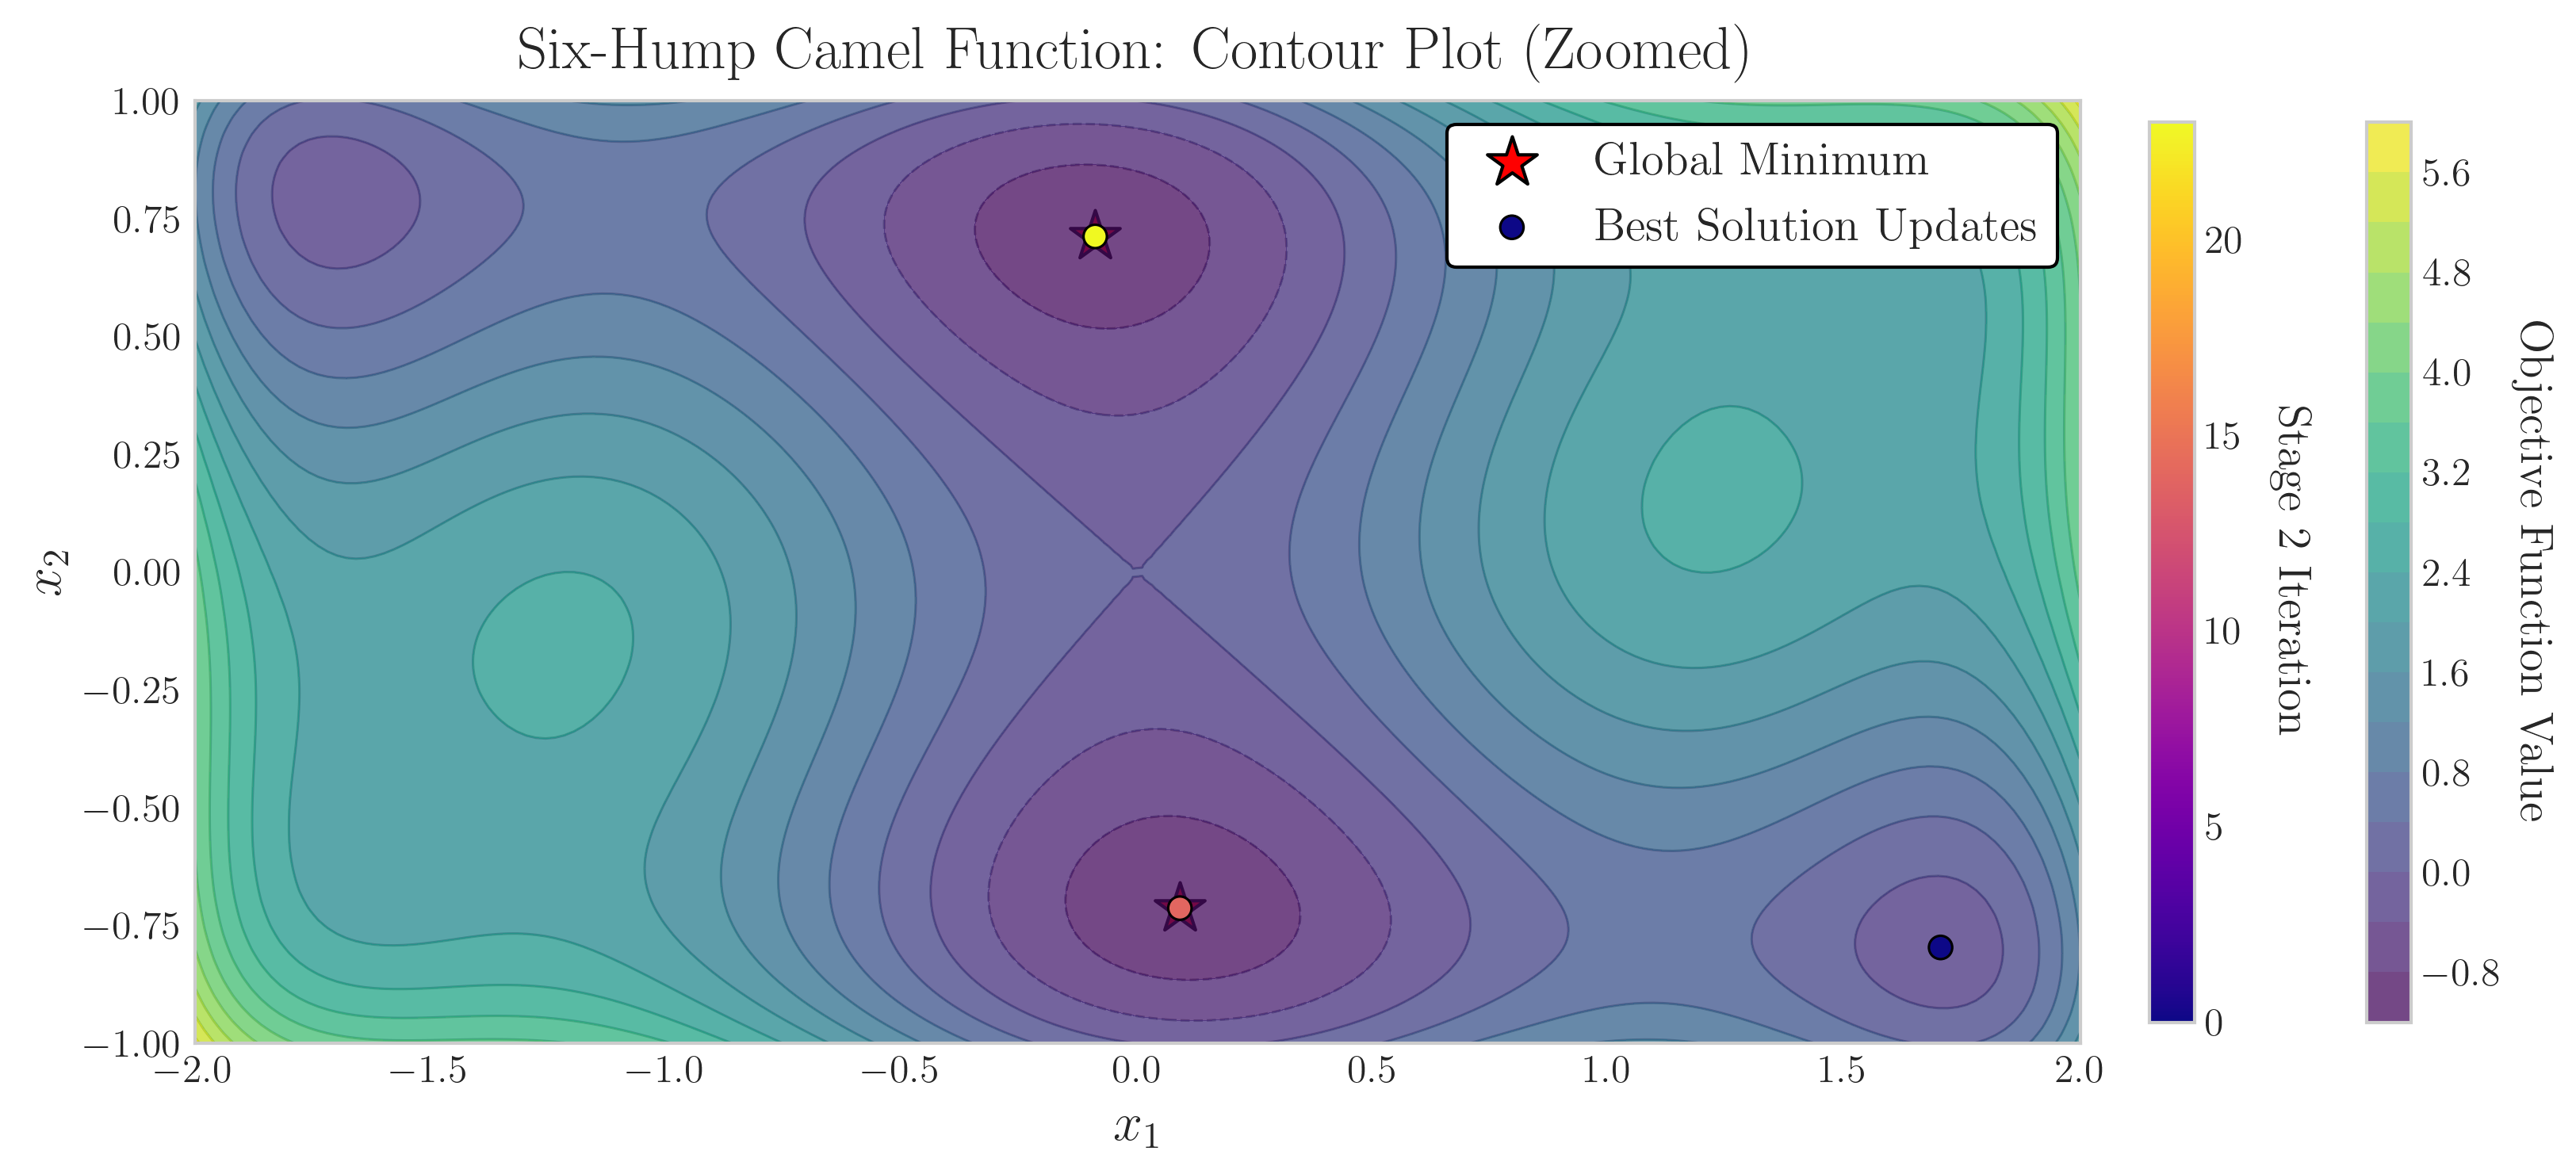

In [7]:
# Use custom zoomed bounds for Six Hump Camel
bounds = {"x_min": -2, "x_max": 2, "y_min": -1, "y_max": 1}

# Create meshgrid for contour plot
x_range = np.linspace(bounds["x_min"], bounds["x_max"], 200)
y_range = np.linspace(bounds["y_min"], bounds["y_max"], 200)
X, Y = np.meshgrid(x_range, y_range)
Z = six_hump_camel(X, Y)

# Extract points where best objective actually changes in Stage 2
# Compare each row with the previous row to detect changes
stage2_changes = stage2_df[
    (stage2_df["best_objective"] != stage2_df["best_objective"].shift(1))
    | (stage2_df["best_x1"] != stage2_df["best_x1"].shift(1))
    | (stage2_df["best_x2"] != stage2_df["best_x2"].shift(1))
].copy()

print(f"Stage 2 points where best solution changed: {len(stage2_changes)}")
print(f"Total Stage 2 iterations: {len(stage2_df)}")

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create contour plot
contour = ax.contour(
    X, Y, Z, levels=20, alpha=0.9, colors="gray", linewidths=0.75, zorder=0
)
contourf = ax.contourf(X, Y, Z, levels=20, alpha=0.75, cmap="viridis")

# Add colorbar for contours
cbar1 = plt.colorbar(contourf, ax=ax, shrink=0.40, aspect=20, pad=-0.05)
cbar1.set_label("Objective Function Value", rotation=270, labelpad=15)

# Highlight global minima
for i, minimum in enumerate(GLOBAL_MINIMA):
    ax.scatter(
        minimum["x1"],
        minimum["x2"],
        color="red",
        s=250,
        marker="*",
        edgecolors="black",
        linewidth=1,
        label="Global Minimum" if i == 0 else None,
        zorder=0,
    )

# Plot evaluation points (using stage 2 change points)
scatter = ax.scatter(
    stage2_changes["best_x1"],
    stage2_changes["best_x2"],
    c=stage2_changes["iteration"],
    cmap="plasma",
    s=50,
    alpha=1.0,
    edgecolors="black",
    linewidth=0.75,
    label="Best Solution Updates",
)
# Add colorbar for evaluation points
cbar2 = plt.colorbar(scatter, ax=ax, shrink=0.40, aspect=20, pad=0.03)
cbar2.set_label("Stage 2 Iteration", rotation=270, labelpad=20)

# Formatting
ax.set_xlabel("$x_1$", fontsize=16)
ax.set_ylabel("$x_2$", fontsize=16)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_title("Six-Hump Camel Function: Contour Plot (Zoomed)", fontsize=18, pad=10)
ax.grid(False)
ax.set_aspect("equal", adjustable="box")

# Create legend with explicit frame settings
legend = ax.legend(
    loc="upper right",
    fancybox=True,
    frameon=True,
    shadow=False,
)
legend.set_frame_on(True)
legend.get_frame().set_alpha(1)
legend.get_frame().set_facecolor("white")
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_linewidth(1)

# Set the zoomed bounds
ax.set_xlim(bounds["x_min"], bounds["x_max"])
ax.set_ylim(bounds["y_min"], bounds["y_max"])

plt.tight_layout()

if save_plots:
    filename = "sixhumpcamel_contour_stage_two.svg"
    plt.savefig(filename, bbox_inches="tight")
    print(f"Saved: {filename}")

plt.show()